<a href="https://colab.research.google.com/github/aryu99/IBM-Hackathon/blob/master/Wind_power_generation_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving T1.csv to T1.csv


In [ ]:
dataset = pd.read_csv("T1.csv")
TRAIN_SPLIT = 50530

In [ ]:
print (dataset)

              Date/Time  ...  Wind Direction (°)
0      01 01 2018 00:00  ...          259.994904
1      01 01 2018 00:10  ...          268.641113
2      01 01 2018 00:20  ...          272.564789
3      01 01 2018 00:30  ...          271.258087
4      01 01 2018 00:40  ...          265.674286
...                 ...  ...                 ...
50525  31 12 2018 23:10  ...           80.502724
50526  31 12 2018 23:20  ...           84.062599
50527  31 12 2018 23:30  ...           84.742500
50528  31 12 2018 23:40  ...           84.297913
50529  31 12 2018 23:50  ...           82.274620

[50530 rows x 5 columns]


In [ ]:
dataset.drop(columns = ["Theoretical_Power_Curve (KWh)"])

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,259.994904
1,01 01 2018 00:10,453.769196,5.672167,268.641113
2,01 01 2018 00:20,306.376587,5.216037,272.564789
3,01 01 2018 00:30,419.645905,5.659674,271.258087
4,01 01 2018 00:40,380.650696,5.577941,265.674286
...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,84.297913


In [ ]:
df = dataset
features_considered = ['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Wind Direction (°)']
features = df[features_considered]
features.index = df['Date/Time']
features.head()

,LV ActivePower (kW),Wind Speed (m/s),Wind Direction (°)
Date/Time,,,
01 01 2018 00:00,380.047791,5.311336,259.994904
01 01 2018 00:10,453.769196,5.672167,268.641113
01 01 2018 00:20,306.376587,5.216037,272.564789
01 01 2018 00:30,419.645905,5.659674,271.258087
01 01 2018 00:40,380.650696,5.577941,265.674286


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1613a73128>,
      dtype=object)

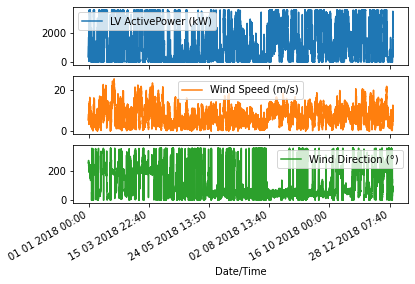

In [ ]:
features.plot(subplots=True)

In [ ]:

dataset = features.values
print(dataset)

# print("sliced", dataset[:, 0])
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)

[[ 380.04779053    5.31133604  259.99490356]
 [ 453.76919556    5.67216682  268.64111328]
 [ 306.37658691    5.2160368   272.56478882]
 ...
 [2201.10693359    8.43535805   84.74250031]
 [2515.6940918     9.42136574   84.2979126 ]
 [2820.46606445    9.97933197   82.27462006]]


In [ ]:
dataset = (dataset-data_mean)/data_std

In [ ]:
# def multivariate_data(dataset, target, start_index, end_index, history_size,
#                       target_size, step, single_step=False):
#   data = []
#   labels = []

#   start_index = start_index + history_size
#   if end_index is None:
#     end_index = len(dataset) - target_size

#   for i in range(start_index, end_index):
#     indices = range(i-history_size, i, step)
#     data.append(dataset[indices])

#     if single_step and (i + target_size)<50530:
#       labels.append(target[i+target_size])
#     else:
#       labels.append(target[i:i+target_size])

#   print(len(labels), len(data))
#   return np.array(data), np.array(labels)

In [ ]:
# past_history = 720
# future_target = 72
# STEP = 6
# BUFFER_SIZE = 10000
# BATCH_SIZE = 256
# x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 0], 0,
#                                                    TRAIN_SPLIT, past_history,
#                                                    future_target, STEP,
#                                                    single_step=True)

In [ ]:
# train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
# train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

In [ ]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if i+target_size<50531:
      if single_step:
        labels.append(target[i+target_size])
      else:
        labels.append(target[i:i+target_size])
  for i in range(1000000):
    if len(data)>49739:
      data.pop(-1)

  print(len(labels), len(data))
  return np.array(data), np.array(labels)

In [ ]:
past_history = 720
future_target = 72
STEP = 6
BUFFER_SIZE = 10000
BATCH_SIZE = 256
# dataset = np.asarray(dataset).astype(np.float32)
# print(dataset[:, 0].dtype)
# print("sliced", dataset[:, 0].dtype)
# print(len(dataset))
# print(dataset.dtype)
# print(dataset)
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 0], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
# x_train_multi = np.asarray(x_train_multi).astype(np.float32)
# y_train_multi = np.asarray(y_train_multi).astype(np.float64)
# print(y_train_multi.dtype)
# print(x_train_multi.shape)
# print(y_train_multi.shape)
# x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, 1],
#                                              TRAIN_SPLIT, None, past_history,
#                                              future_target, STEP)
# x_val_multi = np.asarray(x_val_multi).astype(np.float32)
# y_val_multi = np.asarray(y_val_multi).astype(np.float32)
# print(x_val_multi.dtype)
# print(y_val_multi.dtype)


49739 49739


In [ ]:
print ('Single window of past history : {}'.format(x_train_multi[0].shape))
print ('\n Target power to predict : {}'.format(y_train_multi[0].shape))

Single window of past history : (120, 3)

 Target power to predict : (72,)


In [ ]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

# val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
# val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [ ]:
def create_time_steps(length):
  return list(range(-length, 0))

In [ ]:
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:, 1]), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()

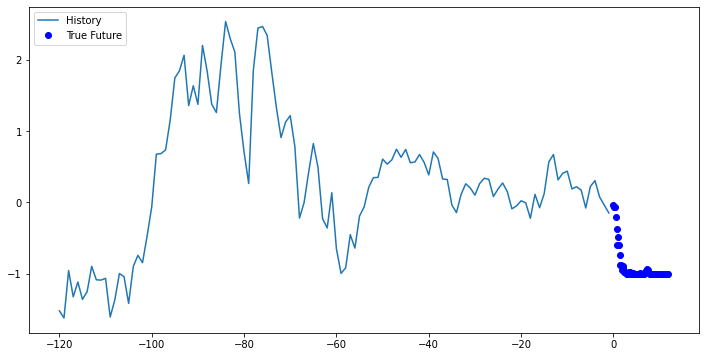

In [ ]:
for x, y in train_data_multi.take(1):
  multi_step_plot(x[0], y[0], np.array([0]))

In [ ]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(72))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')